## **Ankita Pal**

---



### **The Sparks Foundation**
###**Task 1**: Prediction using Unsupervised ML
###**Data** : Iris Dataset

---



### **About Iris Data set**
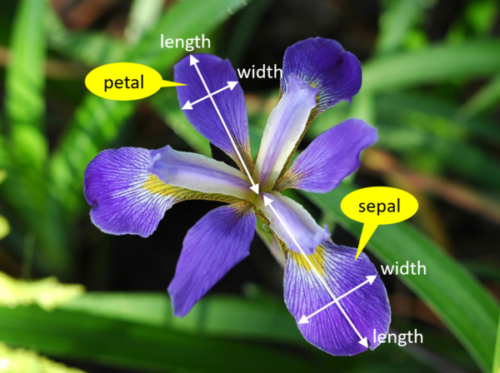

Iris flower data set was introduced by the British statistician and biologist Ronald Fisher in 1936. Iris data set gives the measurements in centimetres of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris ***setosa***, ***versicolor***, and ***virginica***.

---



### **Objective**

The Objective is to predict the optimum number of clusters by using the k-means clustering method and represent it visually.

---



### **Import and Load Python Libraries**

In [26]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Load the Data**

In [27]:
# Load the iris dataset
iris = pd.read_csv("Iris.csv")
iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Explore the Data set**

In [28]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The most important information obtained is there is no null values in the data set. Also, the datatype of all feature the variables is float.

### **Visualizing the Data**

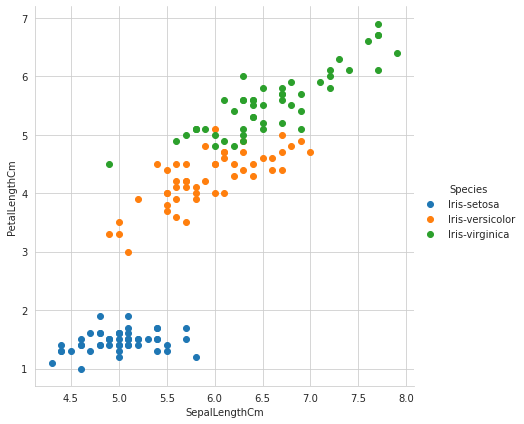

In [30]:
# Graph with background grid
sns.set_style("whitegrid")

# Scatter Plot of Iris data
sns.FacetGrid(iris, hue ="Species",  
              height = 6).map(plt.scatter,  
                              'SepalLengthCm',  
                              'PetalLengthCm').add_legend() 

On visualizing the data, we already find the data points to be groups in some places, which implies that if we apply Cluster analysis, we can obtain a valid result of the data being clustered at some places.

### **k-Means Clustering**
k-means clustering is a method of vector quantization, that aims to partition ***n*** observations into ***k*** clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

In [31]:
# Select machine learning algorithm as k-Means
from sklearn.cluster import KMeans

x = iris.iloc[:, [0, 1, 2, 3]].values

In [32]:
# Compute the squared of distances of data points to centroids
# Determine optimal number of clusters
sum_of_squared_distance = []
K = range(1,10)
optimalK = 1
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(x)
  sum_of_squared_distance.append(km.inertia_)
  if k > 1:
    ratio = sum_of_squared_distance[k-1]/sum_of_squared_distance[k-2]
    if ratio < 0.55:
      optimalK = k

print("Optimal Number of Clusters = ",optimalK)

Optimal Number of Clusters =  3


Therefore, the optimal number of clusters for the Iris data set is found to be 3. Now, the **Elbow Graph** will be plotted to visually represent the optimal number of clusters.

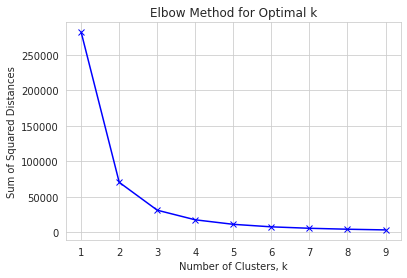

In [33]:
# Plot Elbow Graph
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

The above plot is called the **Elbow Method** because the optimum clusters is where the elbow occurs. Thus this is the points when the within cluster sum of squares does not decrease significantly with every iteration.

**Therefore, we choose the number of clusters for this data set to be 3.**

In [34]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

array([[ 75.5  ,   5.936,   2.77 ,   4.26 ],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464]])

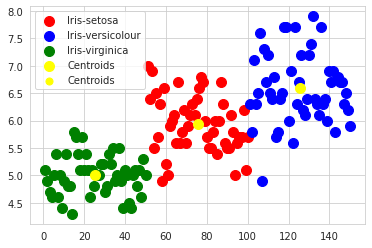

In [37]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')
plt.legend()

The Scatter Plot shows clearly the 3 clusters, represented by red for Setosa, blue for Versicolor and green for Virginica, including the centroids of each cluster represented in yellow.

### **Conclusion**
The Iris data set was found to be divided into 3 clusters by not only using the k-Means algorithm but also visually. 